In [4]:
#Import Library

import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# add drug file

dataframe = pd.read_csv('drug.csv')

In [9]:
# show 5 data from dataframe

dataframe.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
#show information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
# Import LabelENcorder From sklearn
from sklearn.preprocessing import LabelEncoder

# Copy to new variabel for dataframe still keep data
dataframe_int = dataframe.copy()

# Create Object 
encoder = LabelEncoder()

categorical_data = ["Sex","BP", "Cholesterol","Drug"]

# Change All data chategory to numberik with encoder
for kolom in categorical_data:
    dataframe_int[kolom] = encoder.fit_transform(dataframe[kolom])

In [12]:
dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [15]:
#analisis data with numberic

for kolom in categorical_data:
    print(kolom, dataframe_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [16]:
# analisis data not numberic

for kolom in categorical_data:
    print(kolom, dataframe[kolom].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [19]:
# correlation between tables
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


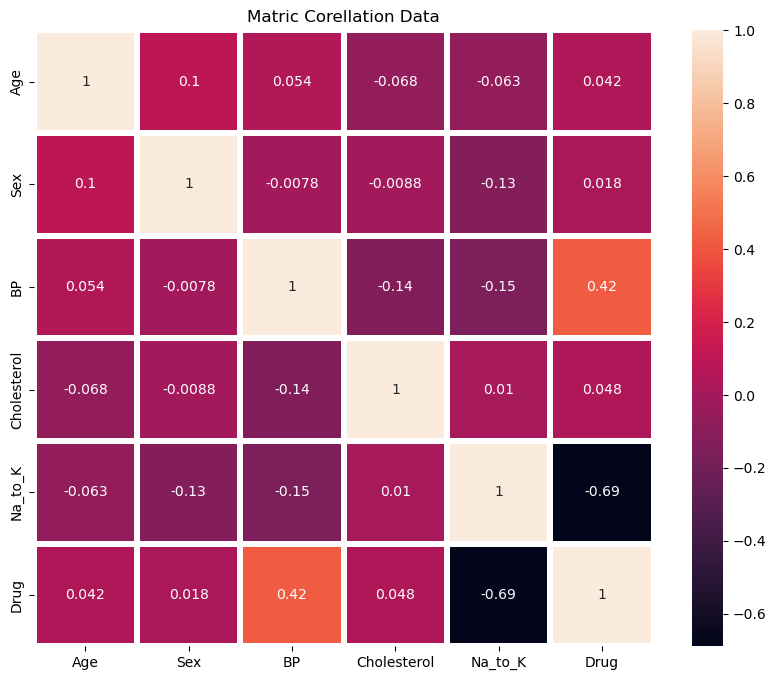

In [31]:
#visualisation data heatmap
plt.figure(figsize=(10,8))
plt.title("Matric Corellation Data")
sns.heatmap(dataframe_int.corr(),annot=True, linewidths=3)
plt.show()

In [62]:
#distribution data
def distribution():
    fig, axes, = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
    plt.suptitle("Distribution", fontsize=24)
    
    def kolom_generator():
        for kolom in dataframe_int:
            yield kolom
    kolom = kolom_generator()
    
    for i in range(0,2):
        for j in range(0,3):
            k = next(kolom)
            dataframe_int[k].plot(kind='hist',ax=axes[i,j])
            axes[i,j].set_title(k)
    plt.show()

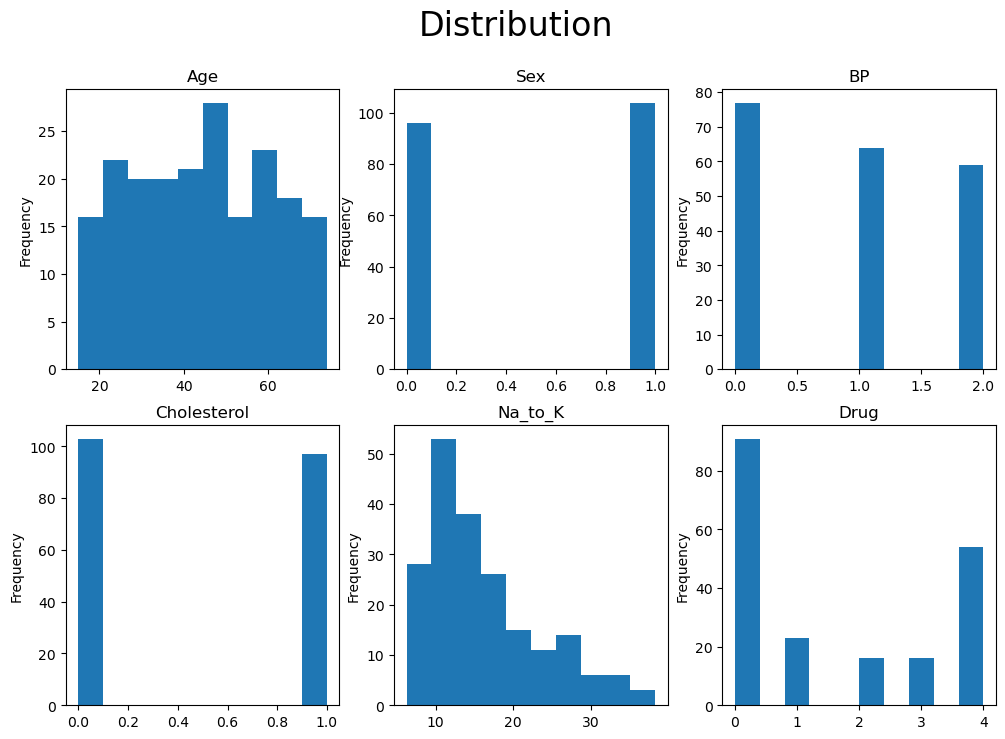

In [63]:
distribution()

In [64]:
data = dataframe_int.drop('Drug', axis=1)
label = dataframe_int['Drug']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [67]:
print(x_train.shape, y_train.shape)

(160, 5) (160,)


In [68]:
print(x_test.shape, y_test.shape)

(40, 5) (40,)
